# Random Imputation

#Advantage
- Can be applied on both numerical and categorical feature
- easy to implement
- data distribution/ variance does not changes.. almost remains intact
- may be good for linear algorithms like linera and logistic regression 
- may be not good for algorithms like decision trees and random forests


#Disadvantage
- covariance with other features may get distrubed/change
- memory heavy for the production, as we have to store training data also for geeting random value in if, at runtime data with missing site came to the algorithm

### A) On numerical data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Datasets\\titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 42)

In [8]:
x_train.shape , x_test.shape

((712, 3), (179, 3))

In [9]:
x_train['age_imputed'] = x_train['Age']
x_test['age_imputed'] = x_test['Age']

In [10]:
x_train.tail()

,Age,Fare,Family,age_imputed
106,21.0,7.6500,0,21.0
270,NaN,31.0000,0,NaN
860,41.0,NaN,2,41.0
435,14.0,120.0000,3,14.0
102,21.0,77.2875,1,21.0


In [11]:
x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['age_imputed'][x_test['age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\Aditya\AppData\Local\Temp\ipykernel_19592\970210058.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
C

In [12]:
x_train

,Age,Fare,Family,age_imputed
331,45.5,28.5000,0,45.5
733,23.0,13.0000,0,23.0
382,32.0,7.9250,0,32.0
704,26.0,7.8542,1,26.0
813,6.0,31.2750,6,6.0
...,...,...,...,...
106,21.0,7.6500,0,21.0
270,NaN,31.0000,0,32.0
860,41.0,NaN,2,41.0
435,14.0,120.0000,3,14.0


C:\Users\Aditya\AppData\Local\Temp\ipykernel_19592\1794611106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'], label = "Orignal")
C:\Users\Aditya\AppData\Local\Temp\ipykernel_19592\1794611106.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['age_imputed'], label = "

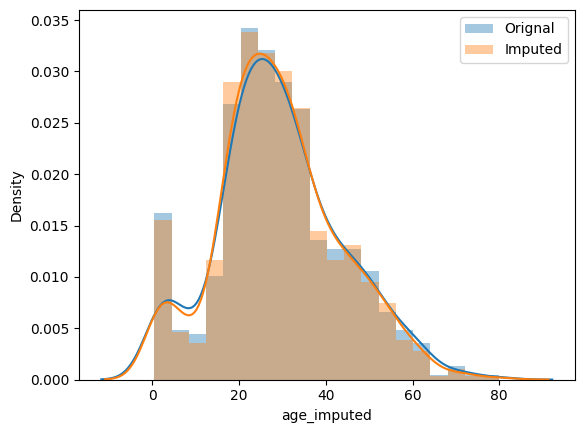

In [19]:
sns.distplot(x_train['Age'], label = "Orignal")
sns.distplot(x_train['age_imputed'], label = "Imputed")

plt.legend()
plt.show()


In [21]:
#compare variance
print("variance in original feature ->",x_train['Age'].var())
print("variance in modifierd feature ->", x_train['age_imputed'].var())

variance in original feature -> 210.2517072477435
variance in modifierd feature -> 198.97486861043947


In [23]:
# Covariance may change

x_train[['Age','age_imputed','Fare']].cov()

,Age,age_imputed,Fare
Age,210.251707,210.251707,75.481375
age_imputed,210.251707,198.974869,70.211188
Fare,75.481375,70.211188,2761.031435


<Axes: >

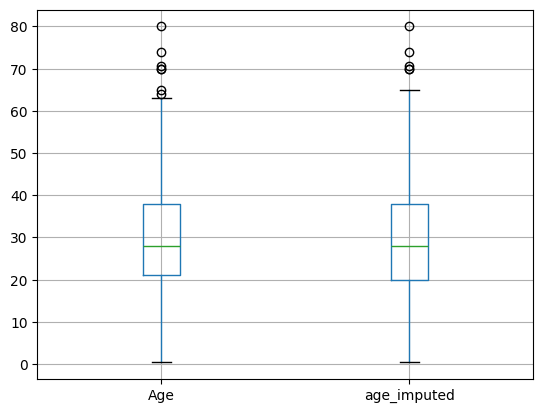

In [25]:
# Not affect significantly on the outliers

x_train[['Age','age_imputed']].boxplot()

### At production, it may happen that for the same input the model gives different values as the random numbers are genterate, this should not happen
- To fix this, we should write such code that will give same output on smae input value
- We can do this with the help of 'Random State', code for the same is provided below

data  = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

# B) Categorical Feature

In [30]:
dataset = pd.read_csv('Datasets\\house-train.csv')

In [32]:
dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [34]:
data = dataset[['GarageQual','FireplaceQu','SalePrice']]

In [36]:
data.sample()

,GarageQual,FireplaceQu,SalePrice
906,TA,Gd,255000


In [38]:
data.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [40]:
x = data
y = data['SalePrice']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [43]:
x_train['garage_qul_inputed'] = x_train['GarageQual']
x_train['firespace_qul_inputed'] = x_train['FireplaceQu']

x_test['garage_qul_inputed'] = x_test['GarageQual']
x_test['firespace_qul_inputed'] = x_test['FireplaceQu']

In [45]:
x_train

,GarageQual,FireplaceQu,SalePrice,garage_qul_inputed,firespace_qul_inputed
455,TA,TA,175500,TA,TA
863,TA,NaN,132500,TA,NaN
504,TA,Fa,147000,TA,Fa
1413,TA,Gd,257000,TA,Gd
1389,TA,Gd,131000,TA,Gd
...,...,...,...,...,...
466,TA,Po,167000,TA,Po
299,TA,Gd,158500,TA,Gd
493,TA,Fa,155000,TA,Fa
527,TA,Gd,446261,TA,Gd


In [ ]:
x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['age_imputed'][x_test['age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values